<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/5%EC%A3%BC%EC%B0%A8_%EC%84%B8%EC%85%98_0405_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y, y_pred)
print(confusion)

[[337  20]
 [ 30 182]]


* 정확도

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.9121265377855887


* 정밀도

In [34]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
print(precision)

0.900990099009901


* 재현율

In [35]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
print(recall)

0.8584905660377359


* F1 score

In [36]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
print(f1)

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [28]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

In [31]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

confusion = confusion_matrix(y, y_pred2)
print(confusion)
accuracy = accuracy_score(y, y_pred2)
print(accuracy)
precision = precision_score(y, y_pred2)
print(precision)
recall = recall_score(y, y_pred2)
print(recall)
f1 = f1_score(y, y_pred2)
print(f1)


[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [20]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y, pred_proba[:, 1])


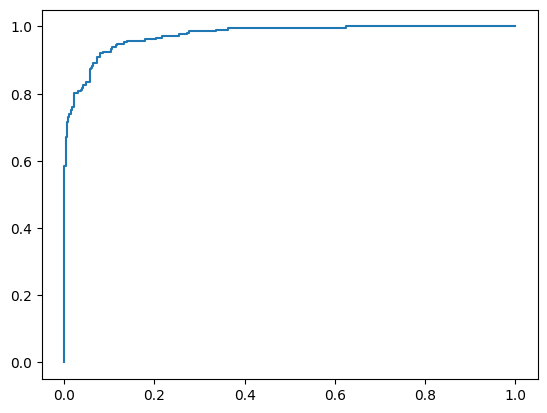

In [37]:
plt.plot(fprs, tprs, label='ROC')

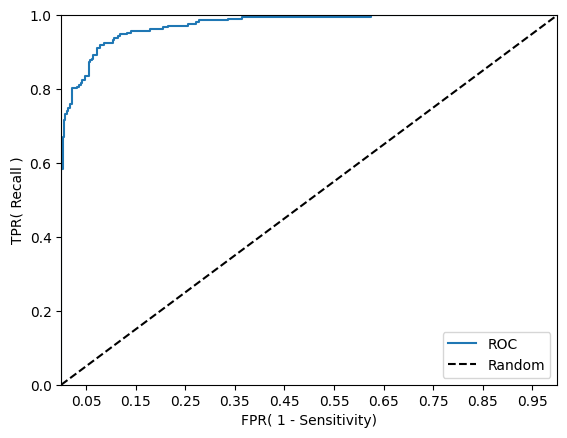

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# ROC 곡선을 그래프 곡선으로 그림.
plt.plot(fprs, tprs, label='ROC')
# 가운데 대각선 직선을 그림.
plt.plot([0,1], [0,1], 'k--', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
plt.legend()

* ROC AUC 값

In [40]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y, y_pred)
print(roc_score)

0.9012340785370753
